# Inaugural Project

Imports and set magics:

In [57]:
import numpy as np
import numba as nb


from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import optimize


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload

%autoreload 2

# Import your own code
from Household import HouseholdSpecializationModelClass



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
# Creating variable model which is set to be the class in HouseholdSpecializationModelClass
model=HouseholdSpecializationModelClass()

# Question 1

In [59]:
# #Creating tuple with shape 3x3
# shape_tuple=(3,3)
#Creating an array of zeros with the shape of shape_tuple to hold values of ratio between HF and HM.

#Creating list of alpha and sigma values.
alpha_values =  [0.25, 0.5, 0.75]
sigma_values =  [0.5, 1.0, 1.5]

# Creating an array of zeros with the shape 3x3.
H_ratio = np.zeros((len(alpha_values), len(sigma_values)))

# Making loop which iterates over each combination of alpha_values and sigma_values calculates the ratio between HF and HM
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        # Setting the parameters in the model to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma
        # Solving model
        opt = model.solve_discrete()
        H_ratio[i, j] = opt.HF/opt.HM
print(H_ratio)


[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


Text(0.5, 0.92, '$\\frac{HF}{HM}$ as a function of $\\alpha$ and $\\sigma$')

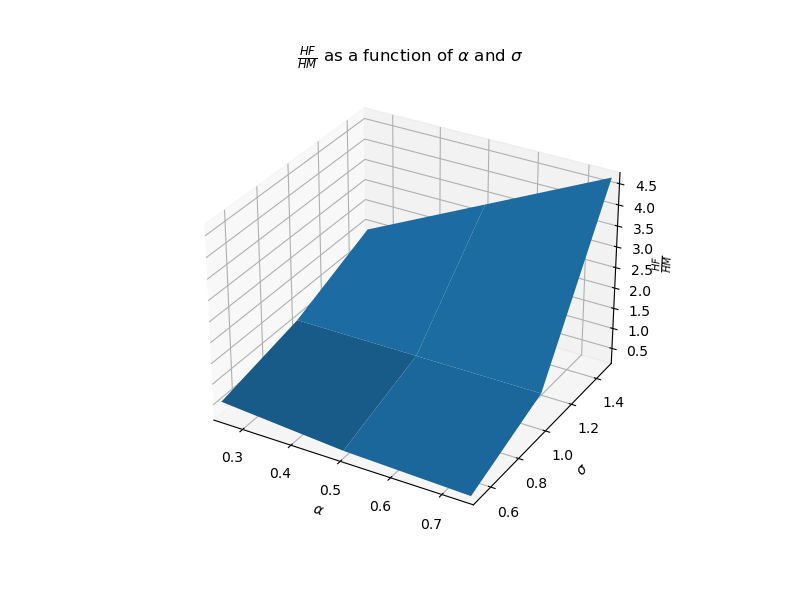

In [60]:
# ***Creating plot***
# To make plot interactive
%matplotlib widget 
# Importen necessary modules
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

#C reating 3d figures
fig = plt.figure(figsize=(8,6)) 
ax = plt.axes(projection='3d') 

# Defining x,y,z to be the alpha values and sigma values and creating meshgrid of these
x = alpha_values
y = sigma_values
X, Y = np.meshgrid(x, y)
Z = H_ratio

# Plotting surface
ax.plot_surface(X, Y, Z)

# Setting labels
ax.set_xlabel(r'$\alpha$') 
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'$\frac{HF}{HM}$')
ax.zaxis.labelpad=0.05


# Setting axis ranges to fit with alpha and sigma values
ax.set_xlim(0.25, 0.75)
ax.set_ylim(0.5, 1.5)



# Adding title
ax.set_title(r'$\frac{HF}{HM}$ as a function of $\alpha$ and $\sigma$')



**Explain how you solve the model**

# Question 2

Explain your code and procedure

Text(0, 0.5, 'log(HF/HM)')

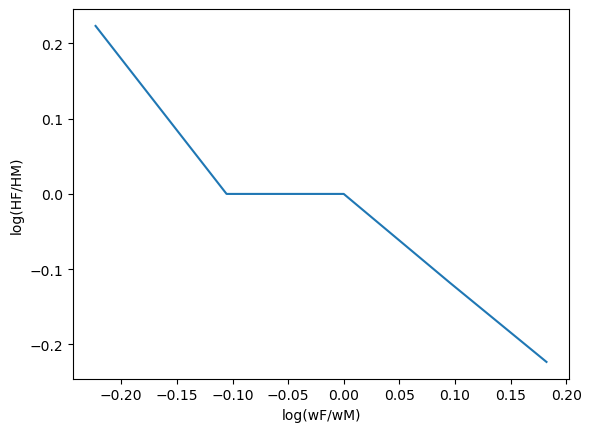

In [61]:

# Setting parameters 
model.par.alpha=0.5
model.par.sigma=1
model.par.wM=1


# Using discrete solver
model.solve_wF_vec(discrete=True)

# Creating arrays with necessary variables
log_wF_vec=np.log(model.par.wF_vec) #Since wM=1 we just take log of WF_vec
log_HFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)

# Creating 2d plot of log(HF/HM) against log(WF/WM)
%matplotlib inline
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(log_wF_vec,log_HFHM)
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')



# Question 3

Text(0, 0.5, 'log(HF/HM)')

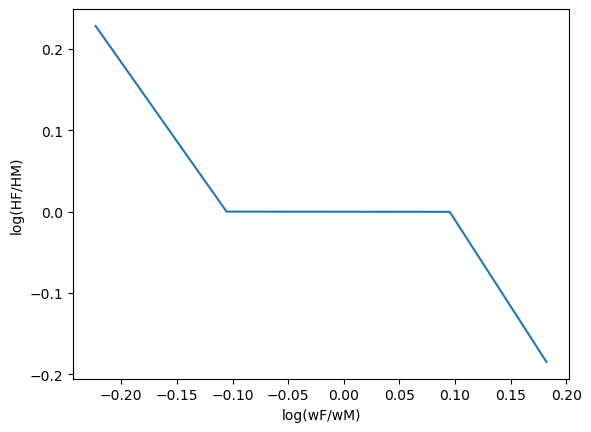

In [62]:
# Calling method that solves the model with continuos set of choices
model.solve_wF_vec(discrete=False)

# Creating arrays with necessary variables as before, but now from continues model.
log_wF_vec=np.log(model.par.wF_vec)
log_HFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)

%matplotlib inline
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(log_wF_vec,log_HFHM)
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')

# Question 4

In [69]:
# Calling method that runs regression and setting the gender-dummy equal to zero such that men and women are equally productive in the home.
model.estimate()
model.par.gender=0
# Printing alpha and sigma estimates.
print(model.sol.alpha_estimate, model.sol.sigma_estimate)
# Setting x-values to estimated values of alpha and sigma
x=[model.sol.alpha_estimate, model.sol.sigma_estimate]
# calling method
model.objective_regression(x)

0.7863604530503224 0.2581655971679559


0.022274371730529655

In [67]:
#To illustrate how good the estimated model fits that data, we plot the two regression lines.

# Creating linspace for x-axis
x1 = np.linspace(-2, 2, 100)

# Regression from Siminski and Yetsenga (2022)
log_HFHM = 0.4 - 0.1*x1
logHFHM_est = model.sol.beta0 +model.sol.beta1*x1
print(model.sol.beta0,model.sol.beta1)




nan nan


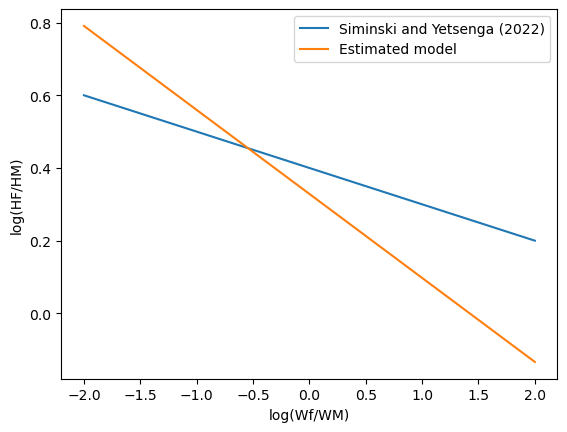

In [45]:
# Plotting the two regression and adding label and legend
plt.plot(x1, log_HFHM, label='Siminski and Yetsenga (2022)')
plt.plot(x1, logHFHM_est, label='Estimated model')
plt.xlabel('log(Wf/WM)')
plt.ylabel('log(HF/HM)')
plt.legend()
plt.show()

Our estimated parameters alpha=0.7863604530503224 sigma=0.2581655971679559 results in a deviation from the findings in Siminski and Yetsenga (2022) of 
0.022274371730529655. This results in a regression line with a more negative slope and a higher starting value. The economic interpretation of this is that the woman in the household works "too much" when she earns little.

# Question 5

In [46]:
# Importing class
model_1=HouseholdSpecializationModelClass()
sol=model_1.sol


We extend the model to the following in which we have made the consumption of time into a Cobb-douglas production function.

$$
\begin{align*}
T_M= L_M^\gamma H_M^{1-\gamma} \\
T_F= L_F^\phi H_F^{1-\phi} \\
L_M+H_M\leq 24 \\
L_W+H_W \leq 24
\end{align*}
$$

In [71]:



# Calling estimation.
model_1.estimate()

par.gender=1

print(sol.sigma_estimate, sol.gamma_estimate, sol.phi_estimate)

# Creating list with solutions
x=[sol.sigma_estimate,sol.gamma_estimate,sol.phi_estimate]
# Calling method to run objective regression.
model_1.objective_regression(x)




NameError: name 'par' is not defined